In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Getting the Data

In [4]:
yelp  = pd.read_csv('yelp.csv')

In [6]:
yelp.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0


In [8]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [10]:
yelp.describe().T

,count,mean,std,min,25%,50%,75%,max
stars,10000.0,3.7775,1.214636,1.0,3.0,4.0,5.0,5.0
cool,10000.0,0.8768,2.067861,0.0,0.0,0.0,1.0,77.0
useful,10000.0,1.4093,2.336647,0.0,0.0,1.0,2.0,76.0
funny,10000.0,0.7013,1.907942,0.0,0.0,0.0,1.0,57.0


In [11]:
yelp['text length'] = yelp['text'].apply(len)

#### Exploratory Data Analysis

In [33]:
sns.set_style('darkgrid')

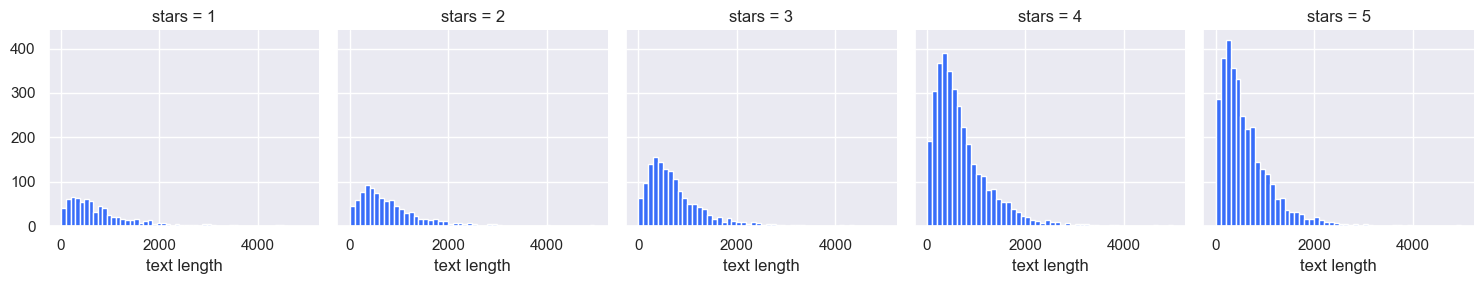

In [34]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length',bins=50)

<Axes: xlabel='stars', ylabel='text length'>

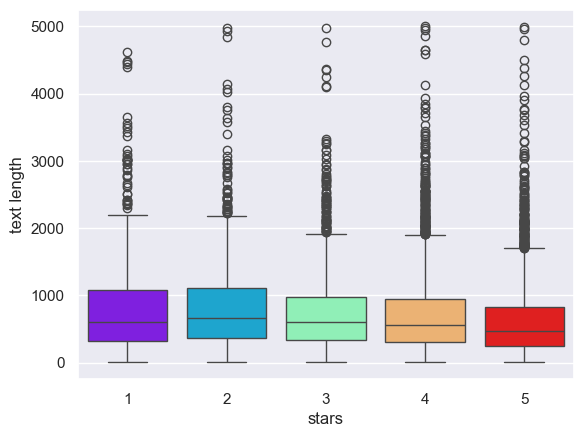

In [35]:
sns.boxplot(data=yelp,x='stars',y='text length',legend=None,palette='rainbow',hue='stars')

/var/folders/62/bzz6yf0s2d91dljw_0dnxgw40000gn/T/ipykernel_22081/529691753.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=yelp,x='stars',palette='rainbow')


<Axes: xlabel='stars', ylabel='count'>

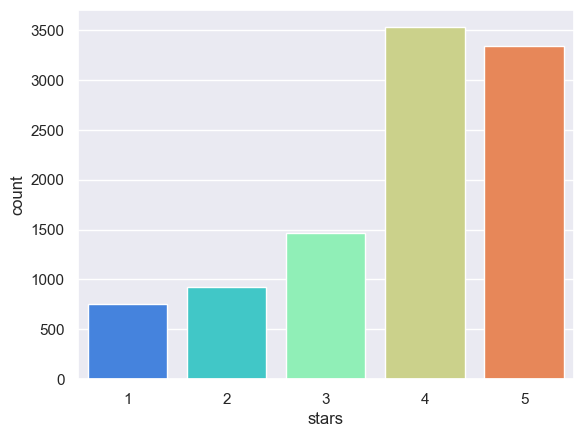

In [36]:
sns.countplot(data=yelp,x='stars',palette='rainbow')

In [39]:
stars = yelp.groupby('stars').mean(numeric_only=True)
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [40]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


<Axes: >

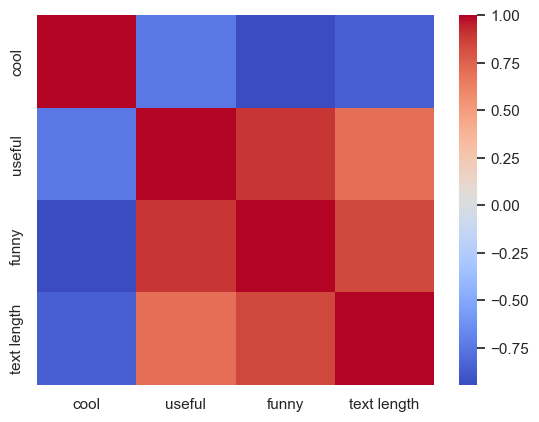

In [43]:
sns.heatmap(stars.corr(),cmap='coolwarm')

####  NLP Classification

In [45]:
yelp_class = yelp[yelp['stars']==1 | (yelp['stars']==5)]

In [47]:
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Index: 749 entries, 23 to 9987
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  749 non-null    object
 1   date         749 non-null    object
 2   review_id    749 non-null    object
 3   stars        749 non-null    int64 
 4   text         749 non-null    object
 5   type         749 non-null    object
 6   user_id      749 non-null    object
 7   cool         749 non-null    int64 
 8   useful       749 non-null    int64 
 9   funny        749 non-null    int64 
 10  text length  749 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 70.2+ KB


In [48]:
X = yelp_class['text']
y = yelp_class['stars']


In [50]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [51]:
X = cv.fit_transform(X)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Training the Model

In [54]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [55]:
nb.fit(X_train,y_train)

MultinomialNB()

#### Predictions and Evaluations

In [56]:
predictions = nb.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix,classification_report

In [59]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[225]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       225

    accuracy                           1.00       225
   macro avg       1.00      1.00      1.00       225
weighted avg       1.00      1.00      1.00       225



#### Using Text Processing

In [60]:
from sklearn.feature_extraction.text import TfidfTransformer

In [62]:
from sklearn.pipeline import Pipeline

In [64]:
pipe = Pipeline([('bow',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',MultinomialNB())])

#### Using the Pipeline

In [65]:
X = yelp_class['text']
y = yelp_class['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [67]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', MultinomialNB())])

#### Predictions and Evaulations

In [68]:
predictions = pipe.predict(X_test)

In [69]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[225]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       225

    accuracy                           1.00       225
   macro avg       1.00      1.00      1.00       225
weighted avg       1.00      1.00      1.00       225

